In [1]:
!pip install wbdata

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 14.0 MB/s eta 0:00:00
  Attempting uninstall: tabulate
    Found existing installation: tabulate 0.9.0
    Uninstalling tabulate-0.9.0:
      Successfully uninstalled tabulate-0.9.0
  Attempting uninstall: decorator
    Found existing installation: decorator 4.4.2
    Uninstalling decorator-4.4.2:
      Successfully uninstalled decorator-4.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
bigframes 1.27.0 requires tabulate>=0.9, but you have tabulate 0.8.10 which is incompatible.
moviepy 1.0.3 requires decorator<5.0,>=4.0.2, but you have decorator 5.1.1 which is incompatible.


In [6]:
import wbdata
import pandas as pd
from datetime import datetime
import time
import os

# Define representative countries for each continent
countries = {
    'North_America': ['USA', 'CAN'],
    'South_America': ['BRA', 'ARG'],
    'Europe': ['DEU', 'GBR', 'FRA'],
    'Asia': ['CHN', 'JPN', 'IND'],
    'Africa': ['ZAF', 'NGA', 'EGY'],
    'Oceania': ['AUS', 'NZL']
}

# Define indicators
indicators = {
    'FR.INR.RINR': 'Real Interest Rate',
    'FP.CPI.TOTL.ZG': 'Inflation Rate',
    'FM.LBL.BMNY.ZG': 'Broad Money Growth',
    'PA.NUS.FCRF': 'Exchange Rate (USD)',
    'NY.GDP.MKTP.KD.ZG': 'GDP Growth',
    'SL.UEM.TOTL.ZS': 'Unemployment Rate'
}

# Create data directory if it doesn't exist
os.makedirs('data', exist_ok=True)

# Initialize dictionary to store data frames
continent_data = {}

# Fetch data for each continent
for continent, country_list in countries.items():
    continent_dfs = []

    for country in country_list:
        try:
            # Add delay to respect API rate limits
            time.sleep(2)
            df = wbdata.get_dataframe(indicators, country=country)
            df.columns = [f"{col}_{country}" for col in df.columns]
            continent_dfs.append(df)
        except Exception as e:
            print(f"Error fetching data for {country}: {e}")
            continue

    # Combine all country data for the continent
    if continent_dfs:
        try:
            continent_data[continent] = pd.concat(continent_dfs, axis=1)

            # Clean and save data
            continent_data[continent] = continent_data[continent].sort_index()
            continent_data[continent] = continent_data[continent].fillna(method='ffill')
            continent_data[continent].to_csv(f'data/economic_indicators_{continent}.csv')
        except Exception as e:
            print(f"Error processing data for {continent}: {e}")

# Create consolidated dataset
try:
    if continent_data:
        all_data = pd.concat(continent_data.values(), axis=1)
        all_data.to_csv('data/economic_indicators_all.csv')
        print("Data collection complete. Check CSV files in the data directory.")
    else:
        print("No data was collected.")
except Exception as e:
    print(f"Error creating consolidated dataset: {e}")

<ipython-input-6-44f6868b4b8f>:55: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  continent_data[continent] = continent_data[continent].fillna(method='ffill')
<ipython-input-6-44f6868b4b8f>:55: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  continent_data[continent] = continent_data[continent].fillna(method='ffill')
<ipython-input-6-44f6868b4b8f>:55: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  continent_data[continent] = continent_data[continent].fillna(method='ffill')
<ipython-input-6-44f6868b4b8f>:55: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  continent_data[continent] = continent_data[continent].fillna(method='ffill')


Data collection complete. Check CSV files in the data directory.


<ipython-input-6-44f6868b4b8f>:55: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  continent_data[continent] = continent_data[continent].fillna(method='ffill')


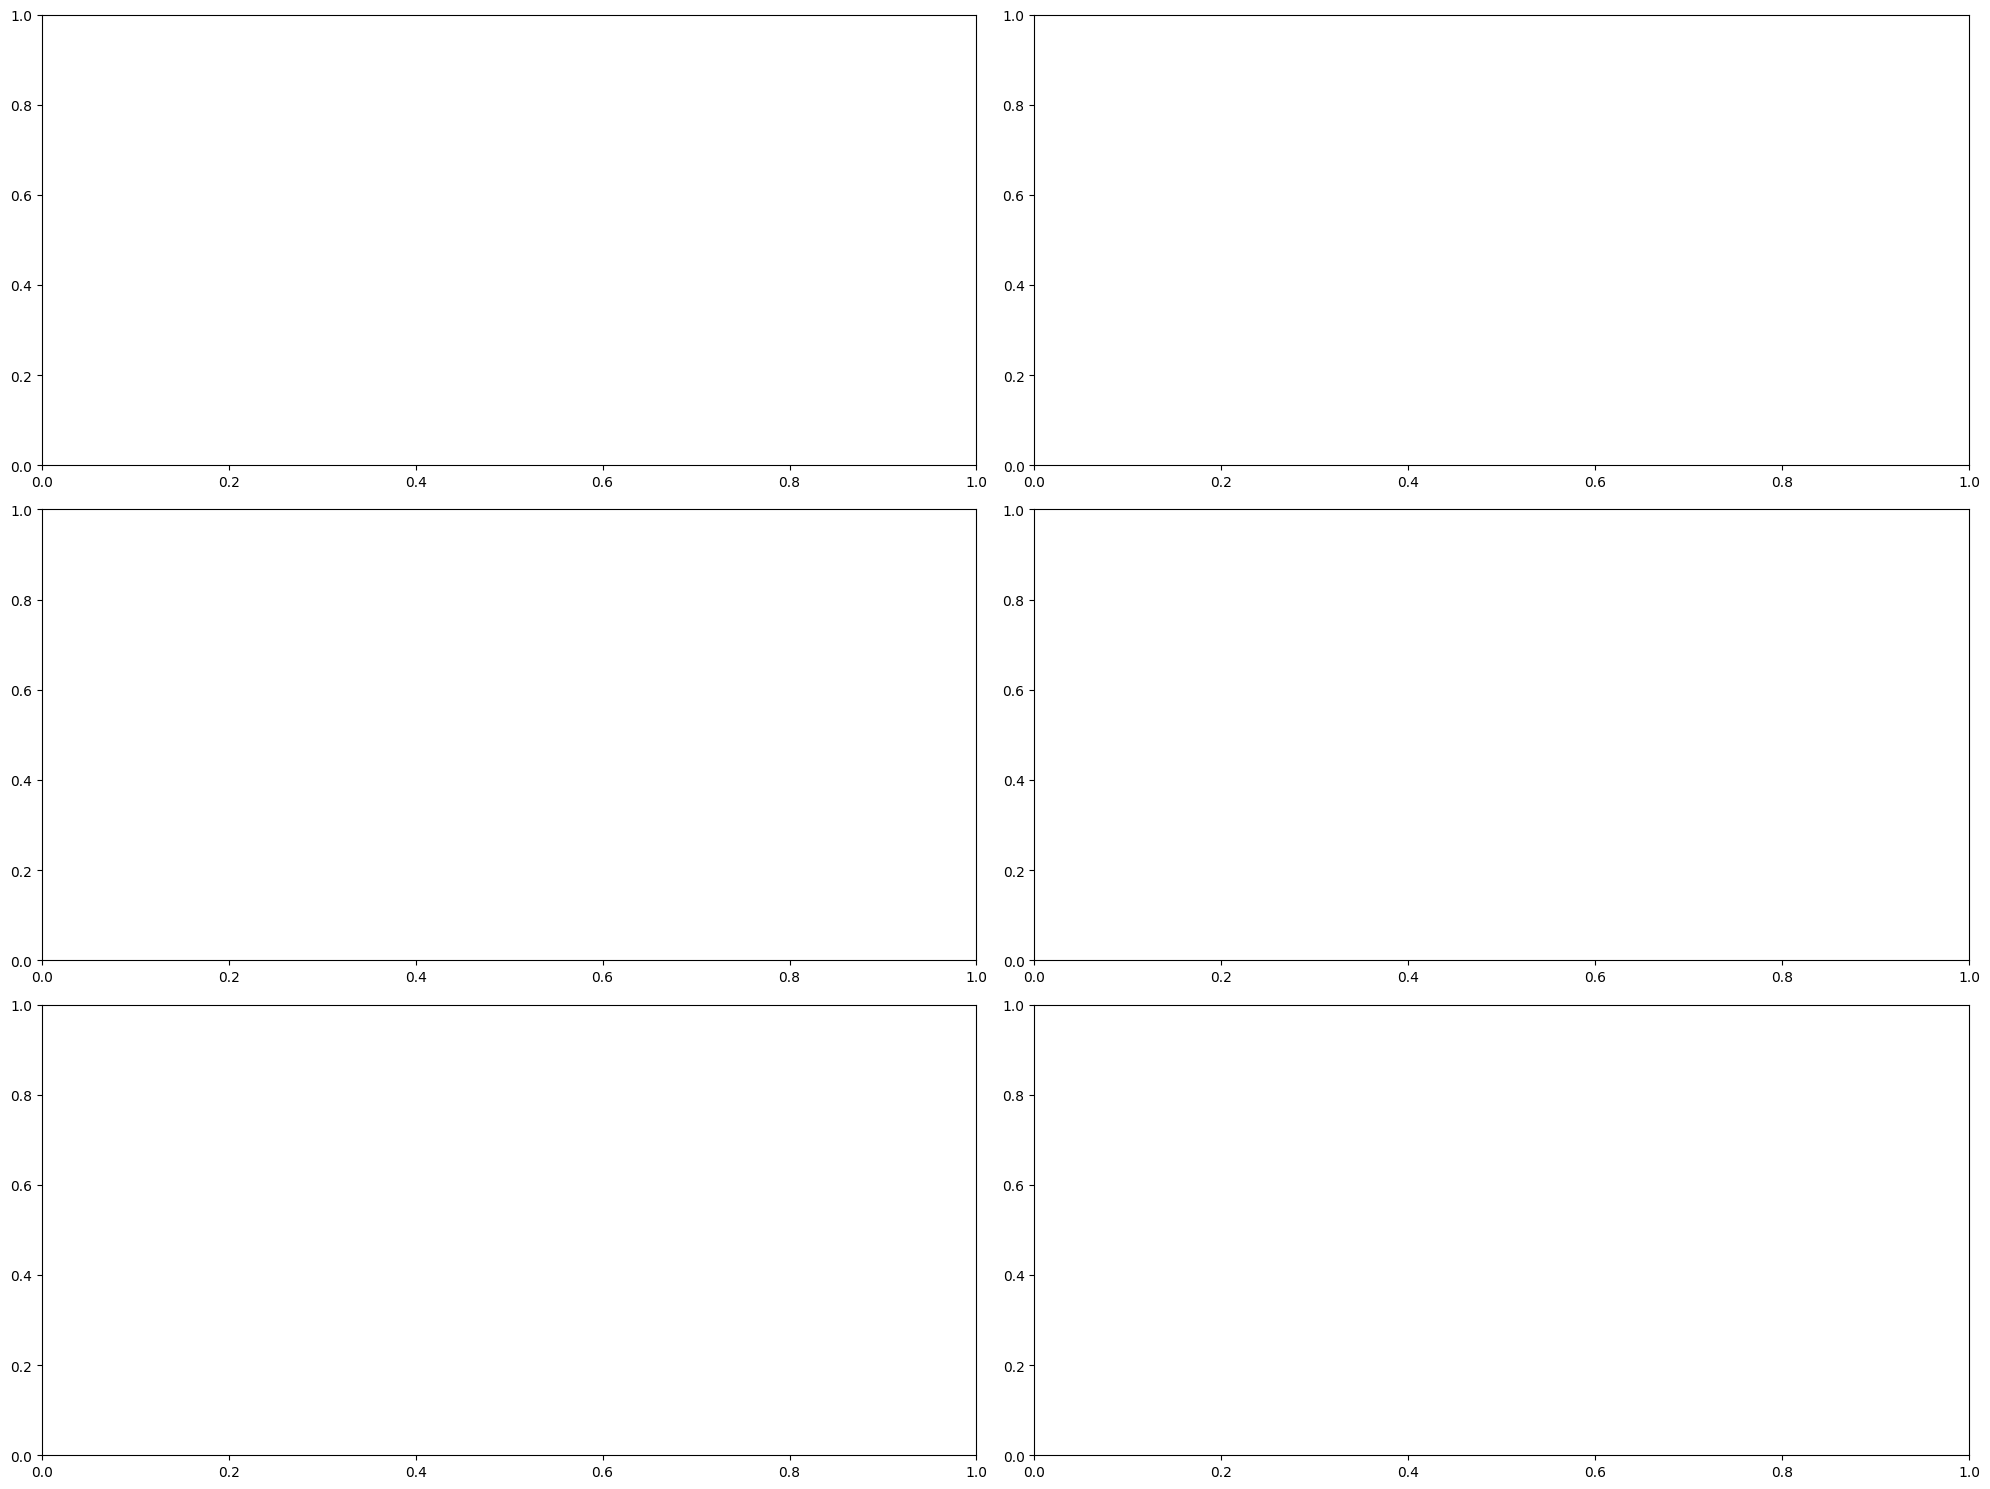

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Read all continental CSV files
data_path = '/content/data'
continents = ['North_America', 'South_America', 'Europe', 'Asia', 'Africa', 'Oceania']
continent_data = {}

for continent in continents:
    file_path = os.path.join(data_path, f'economic_indicators_{continent}.csv')
    if os.path.exists(file_path):
        continent_data[continent] = pd.read_csv(file_path, index_col=0)
        if continent_data[continent].empty:
                print(f"WARNING: Empty dataset for {continent}")
                continue
    else:
        print(f"ERROR: File not found for {continent}")
        continue

# Set default style
plt.style.use('default')

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(20, 15))

# Colors for each continent
colors = {
    'North_America': '#1f77b4',
    'South_America': '#2ca02c',
    'Europe': '#d62728',
    'Asia': '#9467bd',
    'Africa': '#ff7f0e',
    'Oceania': '#8c564b'
}

# Mapping of indicators to their display names
indicators = {
    'NY.GDP.MKTP.KD.ZG': ('GDP Growth', (0,0)),
    'FP.CPI.TOTL.ZG': ('Inflation Rate', (0,1)),
    'FR.INR.RINR': ('Real Interest Rate', (1,0)),
    'PA.NUS.FCRF': ('Exchange Rate (USD)', (1,1)),
    'FM.LBL.BMNY.ZG': ('Broad Money Growth', (2,0)),
    'SL.UEM.TOTL.ZS': ('Unemployment Rate', (2,1))
}

# Plot each indicator
for indicator_code, (title, (row, col)) in indicators.items():
    has_data = False
    for continent, df in continent_data.items():
        # Find columns for this indicator
        indicator_cols = [col for col in df.columns if indicator_code in col]
        if indicator_cols:
            has_data = True
            # Plot first country's data for each continent
            axes[row,col].plot(df.index,
                             df[indicator_cols[0]],
                             label=continent,
                             color=colors[continent],
                             linewidth=2)

    if has_data:
        axes[row,col].set_title(f'{title} (%)', fontsize=12, pad=10)
        axes[row,col].legend(loc='best')
        axes[row,col].grid(True, alpha=0.3)
        axes[row,col].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig('economic_indicators_comparison.png', dpi=300, bbox_inches='tight')
plt.show()